# Problem  Statement: Life Insurance Data 

The dataset belongs to a leading life insurance company. The company wants to predict the 
bonus for its agents so that it may design appropriate engagement activity for their high 
performing agents and upskill programs for low performing agents.


# Importing required packages and dataset¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
sns.set(color_codes=True)
color = sns.color_palette()
import warnings
warnings.filterwarnings("ignore")
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn import metrics
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [2]:
df = pd.read_excel('D:\Capstone project_Topics\LI_BFSI_01 - Life Insurance Sales\Sales.xlsx',sheet_name='Sales')

# Checking the data

In [3]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [4]:
df.tail()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
4515,7004515,3953,4.0,8.0,Agent,Small Business,Graduate,Male,4,Senior Manager,2.0,Single,26355.0,0,2.0,636473.0,West,Yearly,9,1.0
4516,7004516,2939,9.0,9.0,Agent,Salaried,Under Graduate,Female,2,Executive,2.0,Married,20991.0,0,3.0,296813.0,North,Yearly,1,3.0
4517,7004517,3792,23.0,23.0,Agent,Salaried,Engineer,Female,5,AVP,5.0,Single,NaN,0,2.0,667371.0,North,Half Yearly,4,1.0
4518,7004518,4816,10.0,10.0,Online,Small Business,Graduate,Female,4,Executive,2.0,Single,20068.0,0,6.0,943999.0,West,Half Yearly,1,5.0
4519,7004519,4764,14.0,10.0,Agent,Salaried,Under Graduate,Female,5,Manager,2.0,Married,23820.0,0,3.0,700308.0,North,Half Yearly,1,3.0


# Find out unique values in each categorical column

In [5]:
df["Occupation"].unique()

array(['Salaried', 'Free Lancer', 'Small Business', 'Laarge Business',
       'Large Business'], dtype=object)

In [6]:
df["EducationField"].unique()

array(['Graduate', 'Post Graduate', 'UG', 'Under Graduate', 'Engineer',
       'Diploma', 'MBA'], dtype=object)

In [7]:
df["Gender"].unique()

array(['Female', 'Male', 'Fe male'], dtype=object)

In [8]:
df["MaritalStatus"].unique()

array(['Single', 'Divorced', 'Unmarried', 'Married'], dtype=object)

In [9]:
df["Designation"].unique()

array(['Manager', 'Exe', 'Executive', 'VP', 'AVP', 'Senior Manager'],
      dtype=object)

# Making spelling changes and update in dataframe

In [10]:
df['Occupation'] = df['Occupation'].replace(to_replace='Laarge Business', value='Large Business')
df['EducationField'] = df['EducationField'].replace(to_replace='UG', value='Under Graduate')
df['EducationField'] = df['EducationField'].replace(to_replace='Graduate', value='Under Graduate')
df['EducationField'] = df['EducationField'].replace(to_replace='Engineer', value='Under Graduate')
df['EducationField'] = df['EducationField'].replace(to_replace='MBA', value='Post Graduate')
df['Gender'] = df['Gender'].replace(to_replace='Fe male', value='Female')
df['MaritalStatus'] = df['MaritalStatus'].replace(to_replace='Unmarried', value='Single')
df['Designation'] = df['Designation'].replace(to_replace='Exe', value='Executive')

After updating the value and displaying the rows

In [11]:
df.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Under Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Under Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Under Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

# Missing Values

In [13]:
df.isnull().sum()

CustID                    0
AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [14]:
df.shape

(4520, 20)

# Checking the categorical value counts

In [15]:
df.Channel.value_counts()

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [16]:
df.EducationField.value_counts()

Under Graduate    3698
Diploma            496
Post Graduate      326
Name: EducationField, dtype: int64

In [17]:
df.Gender.value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [18]:
df.Designation.value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [19]:
df.MaritalStatus.value_counts()

Married     2268
Single      1448
Divorced     804
Name: MaritalStatus, dtype: int64

In [20]:
df.Zone.value_counts()

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

In [21]:
df.PaymentMethod.value_counts()

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

# Summary of data

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustID,4520.0,7.002260e+06,1304.955938,7000000.0,7001129.75,7002259.5,7003389.25,7004519.0
AgentBonus,4520.0,4.077838e+03,1403.321711,1605.0,3027.75,3911.5,4867.25,9608.0
Age,4251.0,1.449471e+01,9.037629,2.0,7.00,13.0,20.00,58.0
CustTenure,4294.0,1.446903e+01,8.963671,2.0,7.00,13.0,20.00,57.0
ExistingProdType,4520.0,3.688938e+00,1.015769,1.0,3.00,4.0,4.00,6.0
NumberOfPolicy,4475.0,3.565363e+00,1.455926,1.0,2.00,4.0,5.00,6.0
MonthlyIncome,4284.0,2.289031e+04,4885.600757,16009.0,19683.50,21606.0,24725.00,38456.0
Complaint,4520.0,2.871681e-01,0.452491,0.0,0.00,0.0,1.00,1.0
ExistingPolicyTenure,4336.0,4.130074e+00,3.346386,1.0,2.00,3.0,6.00,25.0
SumAssured,4366.0,6.199997e+05,246234.822140,168536.0,439443.25,578976.5,758236.00,1838496.0


# Checking Duplicate values

In [23]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
df[dups]

Number of duplicate rows = 0


,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore


# Dropping customer id column

In [24]:
df = df.drop(['CustID','PaymentMethod'], axis=1)

In [25]:
df.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,Agent,Salaried,Under Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,5,2.0
1,2214,11.0,2.0,Third Party Partner,Salaried,Under Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,7,3.0
2,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Executive,3.0,Single,17090.0,1,2.0,NaN,North,0,3.0
3,1791,11.0,NaN,Third Party Partner,Salaried,Under Graduate,Female,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,0,5.0
4,2955,6.0,NaN,Agent,Small Business,Under Graduate,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,2,5.0


In [26]:
df_numercial = df[['AgentBonus','Age','CustTenure','ExistingProdType','NumberOfPolicy','MonthlyIncome','Complaint','ExistingPolicyTenure','SumAssured','LastMonthCalls','CustCareScore']]

In [27]:
df_numercial

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,4409,22.0,4.0,3,2.0,20993.0,1,2.0,806761.0,5,2.0
1,2214,11.0,2.0,4,4.0,20130.0,0,3.0,294502.0,7,3.0
2,4273,26.0,4.0,4,3.0,17090.0,1,2.0,NaN,0,3.0
3,1791,11.0,NaN,3,3.0,17909.0,1,2.0,268635.0,0,5.0
4,2955,6.0,NaN,3,4.0,18468.0,0,4.0,366405.0,2,5.0
...,...,...,...,...,...,...,...,...,...,...,...
4515,3953,4.0,8.0,4,2.0,26355.0,0,2.0,636473.0,9,1.0
4516,2939,9.0,9.0,2,2.0,20991.0,0,3.0,296813.0,1,3.0
4517,3792,23.0,23.0,5,5.0,NaN,0,2.0,667371.0,4,1.0
4518,4816,10.0,10.0,4,2.0,20068.0,0,6.0,943999.0,1,5.0


In [28]:
for column in df_numercial.columns:
    if df_numercial[column].dtype != 'object':
        median = df_numercial[column].median()
        df_numercial[column] = df_numercial[column].fillna(median)    
        
df_numercial.isnull().sum()  

AgentBonus              0
Age                     0
CustTenure              0
ExistingProdType        0
NumberOfPolicy          0
MonthlyIncome           0
Complaint               0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
dtype: int64

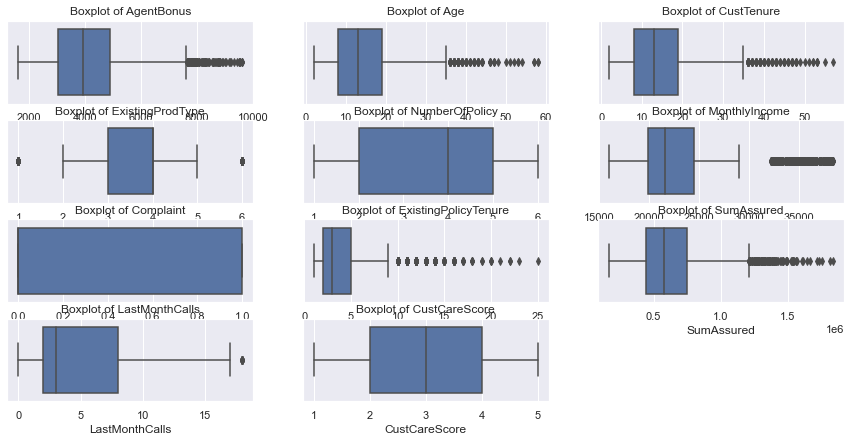

In [29]:
plt.figure(figsize = (15,7))
feature = df_numercial.columns
for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df_numercial[feature[i]], data=df_numercial, color='b');
    plt.title('Boxplot of {}'.format(feature[i]))
   

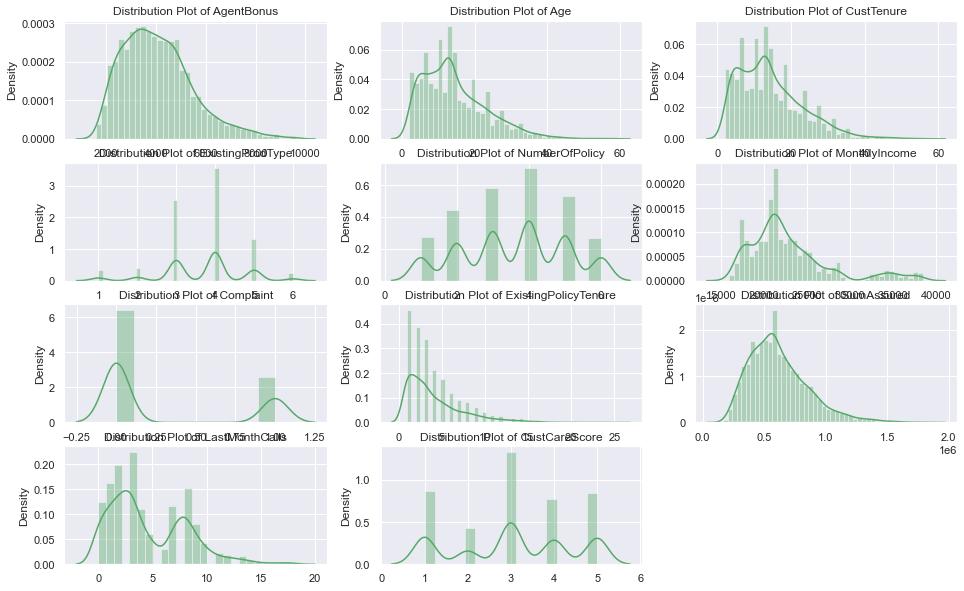

In [30]:
plt.figure(figsize=(16,10))
feature = df_numercial.columns
for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    sns.distplot(x=df_numercial[feature[i]], color='g', kde=True)
    plt.title('Distribution Plot of {}'.format(feature[i]))

# Treating outliers

In [31]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [32]:
Outlier = ['AgentBonus','Age','CustTenure','ExistingProdType','NumberOfPolicy','MonthlyIncome','ExistingPolicyTenure','SumAssured','LastMonthCalls','CustCareScore']
for i in Outlier:
    LL,UL = remove_outlier(df_numercial[i])
    df_numercial[i]=np.where(df_numercial[i]>UL,UL,df_numercial[i])
    df_numercial[i]=np.where(df_numercial[i]<LL,LL,df_numercial[i])

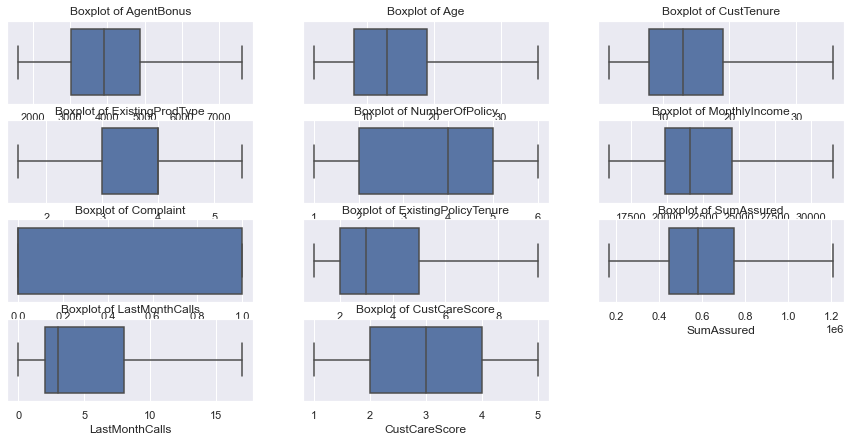

In [33]:
plt.figure(figsize = (15,7))
feature = df_numercial.columns
for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    sns.boxplot(x=df_numercial[feature[i]], data=df_numercial, color='b');
    plt.title('Boxplot of {}'.format(feature[i]))
   

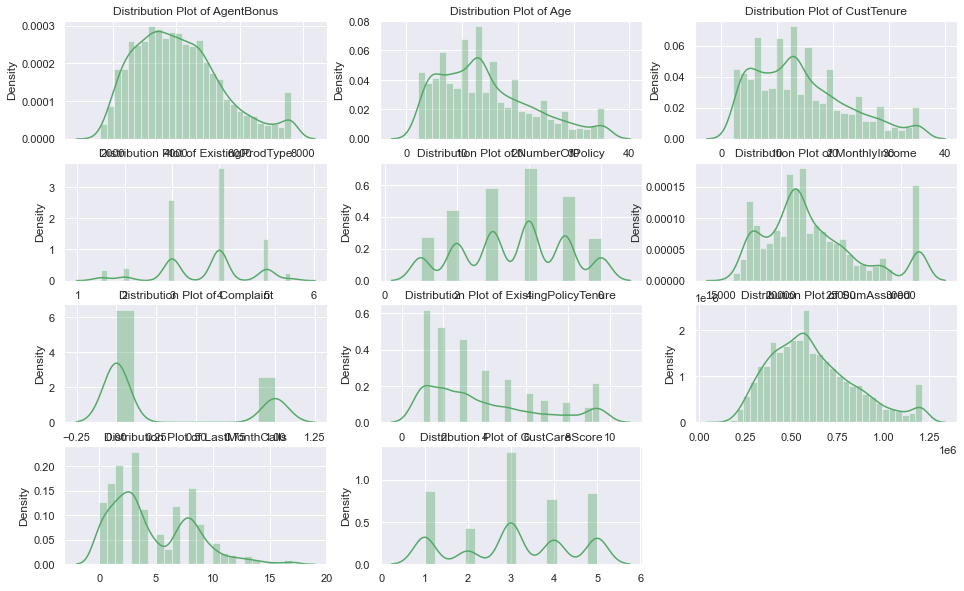

In [34]:
plt.figure(figsize=(16,10))
feature = df_numercial.columns
for i in range(len(feature)):
    plt.subplot(4,3,i+1)
    sns.distplot(x=df_numercial[feature[i]], color='g', kde=True)
    plt.title('Distribution Plot of {}'.format(feature[i]))

In [35]:
df_numercial.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1,2.0,806761.0,5.0,2.0
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0,3.0,294502.0,7.0,3.0
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1,2.0,578976.5,0.0,3.0
3,1791.0,11.0,13.0,3.0,3.0,17909.0,1,2.0,268635.0,0.0,5.0
4,2955.0,6.0,13.0,3.0,4.0,18468.0,0,4.0,366405.0,2.0,5.0


In [36]:
df_numercial.tail()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore
4515,3953.0,4.0,8.0,4.0,2.0,26355.0,0,2.0,636473.0,9.0,1.0
4516,2939.0,9.0,9.0,2.0,2.0,20991.0,0,3.0,296813.0,1.0,3.0
4517,3792.0,23.0,23.0,5.0,5.0,21606.0,0,2.0,667371.0,4.0,1.0
4518,4816.0,10.0,10.0,4.0,2.0,20068.0,0,6.0,943999.0,1.0,5.0
4519,4764.0,14.0,10.0,5.0,2.0,23820.0,0,3.0,700308.0,1.0,3.0


In [37]:
df_cat = df[['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone']]

# Splitting categorical datasets

In [38]:
df_categorical = df[['Channel','Occupation','EducationField','Gender','Designation','MaritalStatus','Zone']]

In [39]:
df_categorical.head()

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone
0,Agent,Salaried,Under Graduate,Female,Manager,Single,North
1,Third Party Partner,Salaried,Under Graduate,Male,Manager,Divorced,North
2,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North
3,Third Party Partner,Salaried,Under Graduate,Female,Executive,Divorced,West
4,Agent,Small Business,Under Graduate,Male,Executive,Divorced,West


# Converting object into categorical codes

In [40]:
df_categorical['Channel']=np.where(df_categorical['Channel'] =='Agent', '1', df_categorical['Channel'])
df_categorical['Channel']=np.where(df_categorical['Channel'] =='Third Party Partner', '2', df_categorical['Channel'])
df_categorical['Channel']=np.where(df_categorical['Channel'] =='Online', '3', df_categorical['Channel'])

In [41]:
df_categorical['Occupation']=np.where(df_categorical['Occupation'] =='Free Lancer', '1', df_categorical['Occupation'])
df_categorical['Occupation']=np.where(df_categorical['Occupation'] =='Large Business', '2', df_categorical['Occupation'])
df_categorical['Occupation']=np.where(df_categorical['Occupation'] =='Salaried', '3', df_categorical['Occupation'])
df_categorical['Occupation']=np.where(df_categorical['Occupation'] =='Small Business', '4', df_categorical['Occupation'])

In [42]:
df_categorical['EducationField']=np.where(df_categorical['EducationField'] =='Diploma', '1', df_categorical['EducationField'])
df_categorical['EducationField']=np.where(df_categorical['EducationField'] =='Under Graduate', '2', df_categorical['EducationField'])
df_categorical['EducationField']=np.where(df_categorical['EducationField'] =='Post Graduate', '3', df_categorical['EducationField'])


In [43]:
df_categorical['Gender']=np.where(df_categorical['Gender'] =='Female', '0', df_categorical['Gender'])
df_categorical['Gender']=np.where(df_categorical['Gender'] =='Male', '1', df_categorical['Gender'])

In [44]:
df_categorical['Designation']=np.where(df_categorical['Designation'] =='Executive', '1', df_categorical['Designation'])
df_categorical['Designation']=np.where(df_categorical['Designation'] =='Manager', '2', df_categorical['Designation'])
df_categorical['Designation']=np.where(df_categorical['Designation'] =='Senior Manager', '3', df_categorical['Designation'])
df_categorical['Designation']=np.where(df_categorical['Designation'] =='AVP', '4', df_categorical['Designation'])
df_categorical['Designation']=np.where(df_categorical['Designation'] =='VP', '5', df_categorical['Designation'])

In [45]:
df_categorical['MaritalStatus']=np.where(df_categorical['MaritalStatus'] =='Married', '1', df_categorical['MaritalStatus'])
df_categorical['MaritalStatus']=np.where(df_categorical['MaritalStatus'] =='Divorced', '2', df_categorical['MaritalStatus'])
df_categorical['MaritalStatus']=np.where(df_categorical['MaritalStatus'] =='Single', '3', df_categorical['MaritalStatus'])

In [46]:
df_categorical['Zone']=np.where(df_categorical['Zone'] =='North', '1', df_categorical['Zone'])
df_categorical['Zone']=np.where(df_categorical['Zone'] =='East', '2', df_categorical['Zone'])
df_categorical['Zone']=np.where(df_categorical['Zone'] =='West', '3', df_categorical['Zone'])
df_categorical['Zone']=np.where(df_categorical['Zone'] =='South', '4', df_categorical['Zone'])

In [47]:
df_categorical.head()

,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone
0,1,3,2,0,2,3,1
1,2,3,2,1,2,2,1
2,1,1,3,1,1,3,1
3,2,3,2,0,1,2,3
4,1,4,2,1,1,2,3


In [48]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Channel         4520 non-null   object
 1   Occupation      4520 non-null   object
 2   EducationField  4520 non-null   object
 3   Gender          4520 non-null   object
 4   Designation     4520 non-null   object
 5   MaritalStatus   4520 non-null   object
 6   Zone            4520 non-null   object
dtypes: object(7)
memory usage: 247.3+ KB


In [49]:
df_categorical['Channel'] = df_categorical['Channel'].astype('int64')
df_categorical['Occupation'] = df_categorical['Occupation'].astype('int64')
df_categorical['EducationField'] = df_categorical['EducationField'].astype('int64')
df_categorical['Gender'] = df_categorical['Gender'].astype('int64')
df_categorical['Designation'] = df_categorical['Designation'].astype('int64')
df_categorical['Zone'] = df_categorical['Zone'].astype('int64')
df_categorical['MaritalStatus'] = df_categorical['MaritalStatus'].astype('int64')

In [50]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Channel         4520 non-null   int64
 1   Occupation      4520 non-null   int64
 2   EducationField  4520 non-null   int64
 3   Gender          4520 non-null   int64
 4   Designation     4520 non-null   int64
 5   MaritalStatus   4520 non-null   int64
 6   Zone            4520 non-null   int64
dtypes: int64(7)
memory usage: 247.3 KB


In [51]:
df1 = pd.concat([df_numercial,  df_categorical], axis=1)
df1.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1,2.0,806761.0,5.0,2.0,1,3,2,0,2,3,1
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0,3.0,294502.0,7.0,3.0,2,3,2,1,2,2,1
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1,2.0,578976.5,0.0,3.0,1,1,3,1,1,3,1
3,1791.0,11.0,13.0,3.0,3.0,17909.0,1,2.0,268635.0,0.0,5.0,2,3,2,0,1,2,3
4,2955.0,6.0,13.0,3.0,4.0,18468.0,0,4.0,366405.0,2.0,5.0,1,4,2,1,1,2,3


# Univariate Analysis

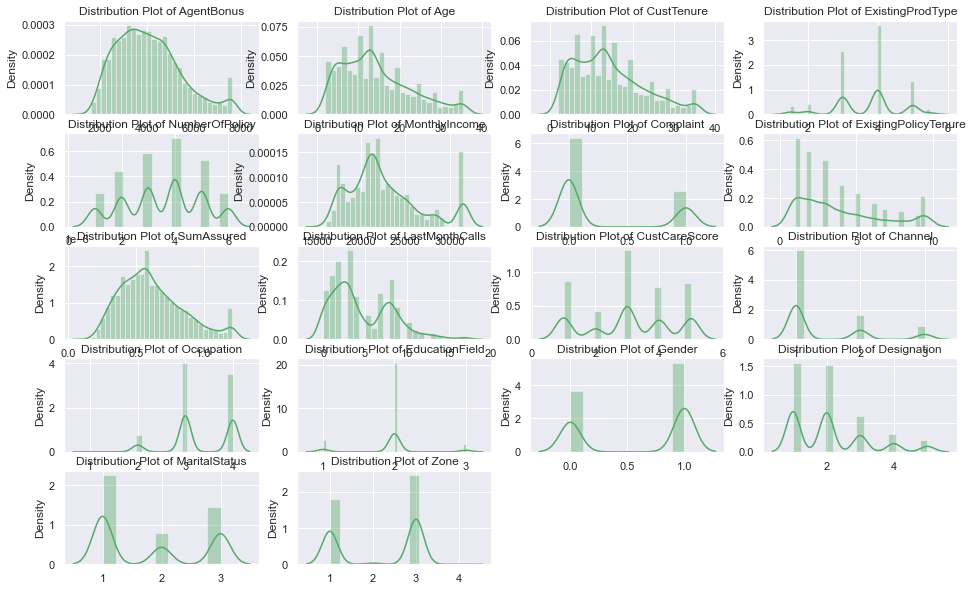

In [52]:
plt.figure(figsize=(16,10))
feature = df1.columns
for i in range(len(feature)):
    plt.subplot(5,4,i+1)
    sns.distplot(x=df1[feature[i]], color='g', kde=True)
    plt.title('Distribution Plot of {}'.format(feature[i]))

<AxesSubplot:xlabel='Channel'>

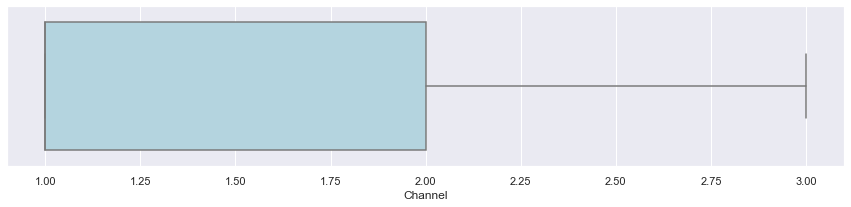

In [53]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df_categorical.Channel, color='lightblue')

<AxesSubplot:xlabel='EducationField'>

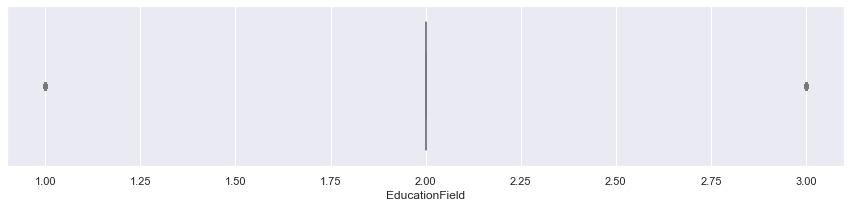

In [54]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df_categorical.EducationField, color='lightblue')

<AxesSubplot:xlabel='Gender'>

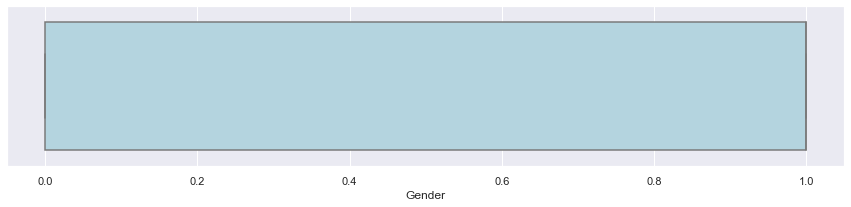

In [55]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df_categorical.Gender , color='lightblue')

<AxesSubplot:xlabel='Occupation'>

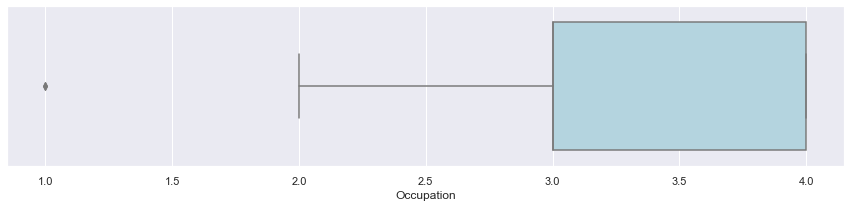

In [56]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df_categorical.Occupation , color='lightblue')

<AxesSubplot:xlabel='NumberOfPolicy'>

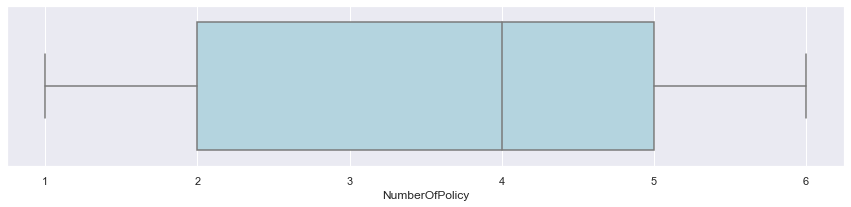

In [57]:
plt.figure(figsize= (15,10))
plt.subplot(3,1,1)
sns.boxplot(x= df_numercial.NumberOfPolicy , color='lightblue')

In [58]:
df2 = pd.concat([df_numercial,  df_cat], axis=1)
df2.head()

,AgentBonus,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone
0,4409.0,22.0,4.0,3.0,2.0,20993.0,1,2.0,806761.0,5.0,2.0,Agent,Salaried,Under Graduate,Female,Manager,Single,North
1,2214.0,11.0,2.0,4.0,4.0,20130.0,0,3.0,294502.0,7.0,3.0,Third Party Partner,Salaried,Under Graduate,Male,Manager,Divorced,North
2,4273.0,26.0,4.0,4.0,3.0,17090.0,1,2.0,578976.5,0.0,3.0,Agent,Free Lancer,Post Graduate,Male,Executive,Single,North
3,1791.0,11.0,13.0,3.0,3.0,17909.0,1,2.0,268635.0,0.0,5.0,Third Party Partner,Salaried,Under Graduate,Female,Executive,Divorced,West
4,2955.0,6.0,13.0,3.0,4.0,18468.0,0,4.0,366405.0,2.0,5.0,Agent,Small Business,Under Graduate,Male,Executive,Divorced,West


# Bivariate analysis

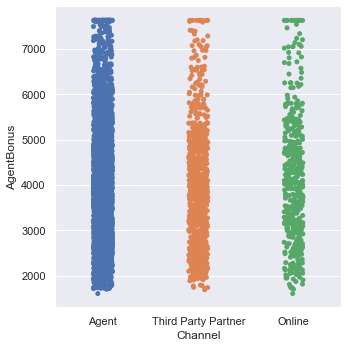

In [59]:
sns.catplot(x='Channel', y='AgentBonus', data=df2)

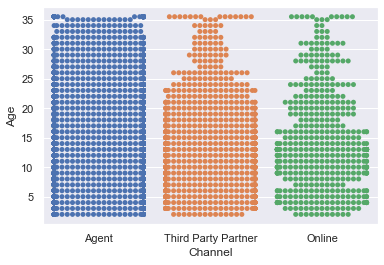

In [60]:
sns.swarmplot(df_cat['Channel'], df1['Age']);

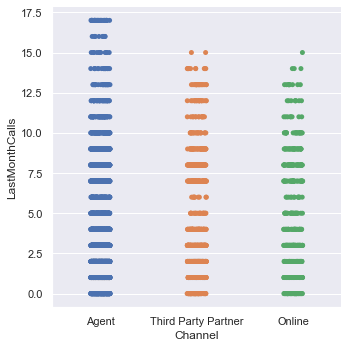

In [61]:
sns.catplot(x='Channel', y='LastMonthCalls', data=df2)

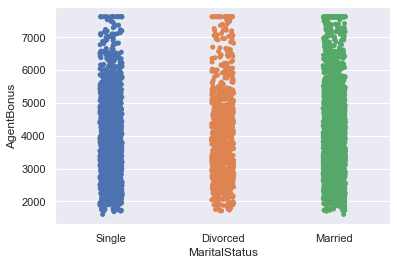

In [62]:
sns.stripplot(df2['MaritalStatus'], df2['AgentBonus'], jitter=True);

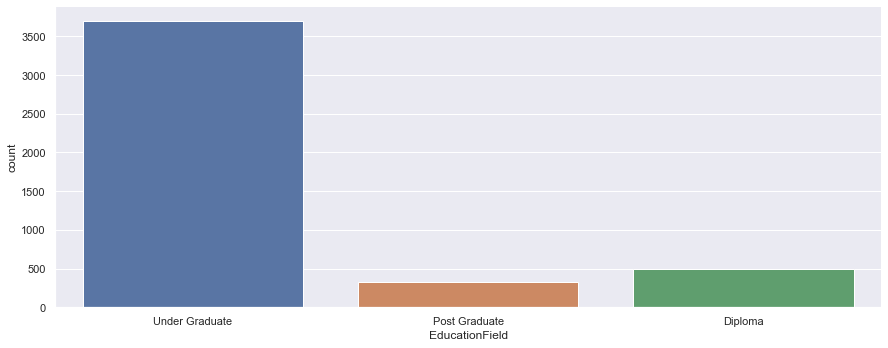

In [63]:
sns.catplot('EducationField', data=df2, kind='count', aspect=2.5)

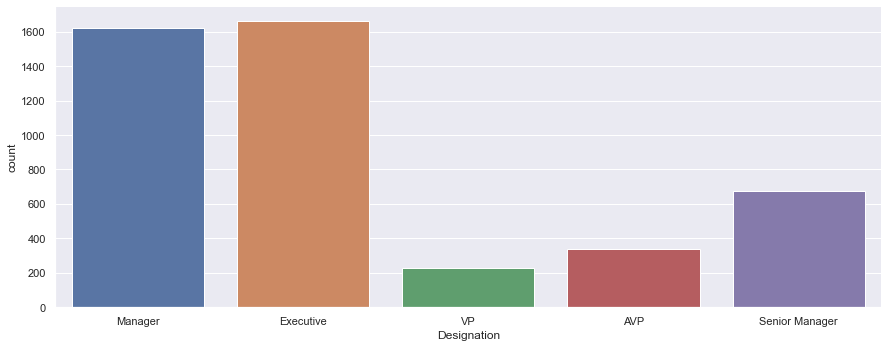

In [64]:
sns.catplot('Designation', data=df2, kind='count', aspect=2.5)

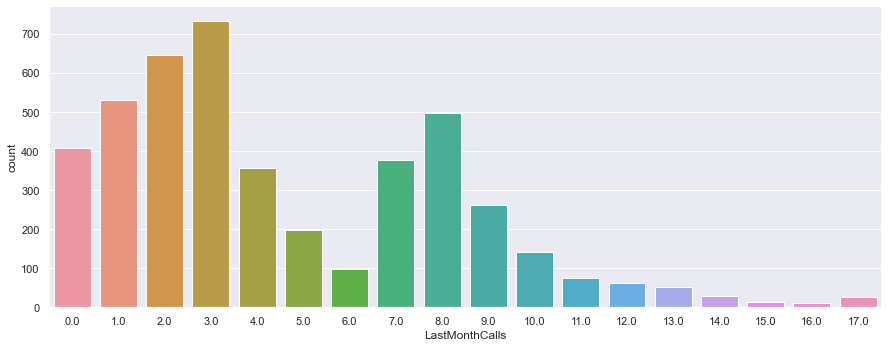

In [65]:
sns.catplot('LastMonthCalls', data=df2, kind='count', aspect=2.5)

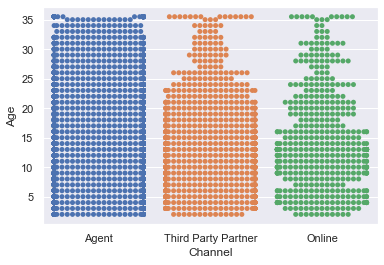

In [66]:
sns.swarmplot(df_cat['Channel'], df1['Age']);

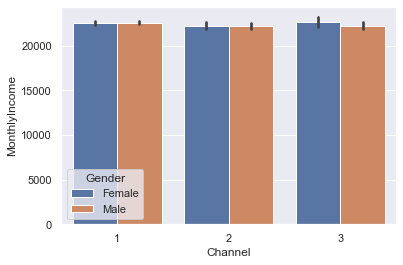

In [67]:
sns.barplot(df1['Channel'], df1['MonthlyIncome'], hue=df_cat['Gender']);

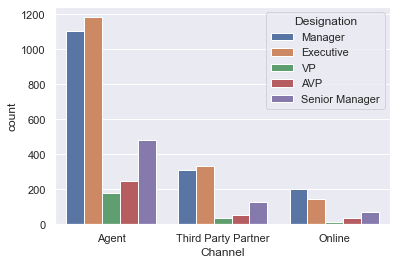

In [68]:
sns.countplot(df_cat['Channel'],hue=df_cat['Designation']);

<AxesSubplot:xlabel='Occupation', ylabel='AgentBonus'>

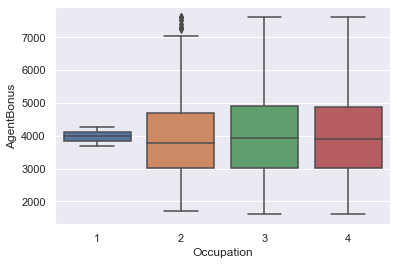

In [69]:
sns.boxplot(x='Occupation', y='AgentBonus', data=df1)

<AxesSubplot:xlabel='ExistingProdType', ylabel='AgentBonus'>

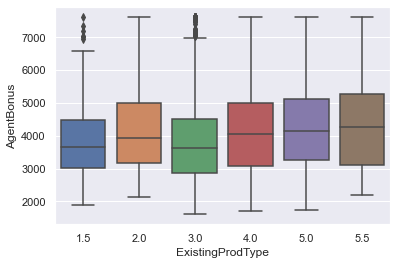

In [70]:
sns.boxplot(x='ExistingProdType', y='AgentBonus', data=df1)

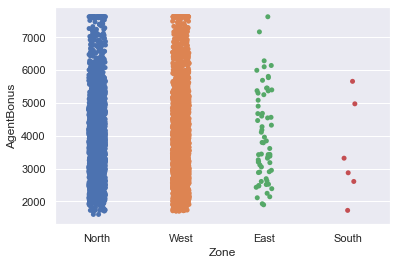

In [71]:
sns.stripplot(df_cat['Zone'], df2['AgentBonus'], jitter=True);

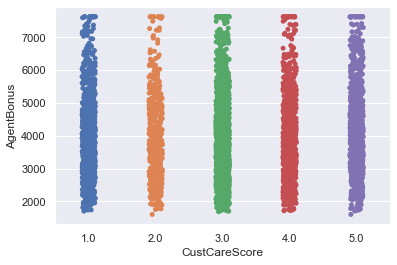

In [72]:
sns.stripplot(df2['CustCareScore'], df2['AgentBonus'], jitter=True);

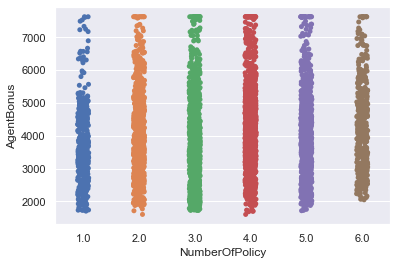

In [73]:
sns.stripplot(df2['NumberOfPolicy'], df2['AgentBonus'], jitter=True);

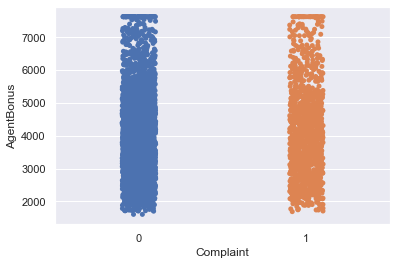

In [74]:
sns.stripplot(df2['Complaint'], df2['AgentBonus'], jitter=True);

# HeatMap

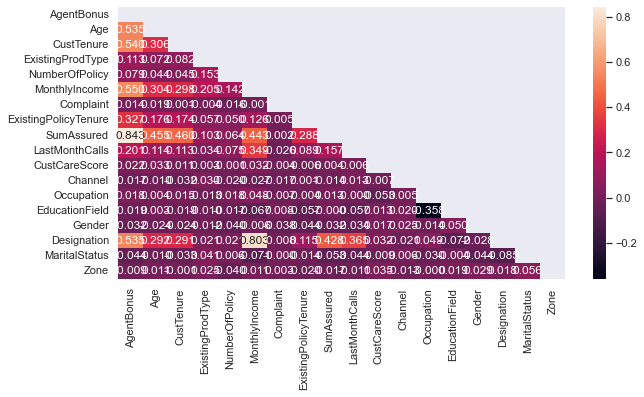

In [75]:
mask = np.zeros_like(df1.corr()) #Creates an array of the same size as df.corr()
mask[np.triu_indices_from(mask)] = True #Returns the indices of the Upper Triangle (if you use tril_indices, it will return lower Triangle)
plt.figure(figsize = (10,5))
sns.heatmap(df1.corr(), annot=True,fmt='.3f',mask=mask);

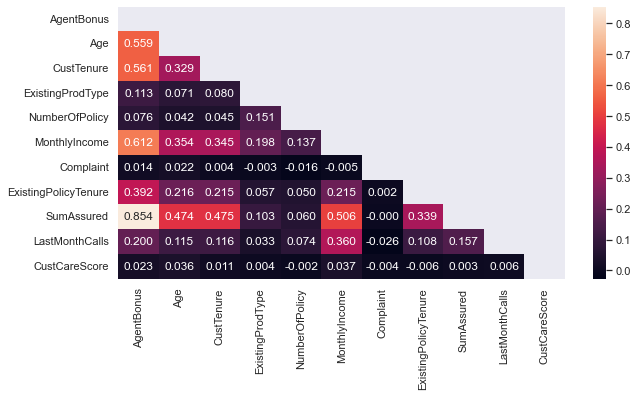

In [76]:
mask = np.zeros_like(df.corr()) #Creates an array of the same size as df.corr()
mask[np.triu_indices_from(mask)] = True #Returns the indices of the Upper Triangle (if you use tril_indices, it will return lower Triangle)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True,fmt='.3f',mask=mask);

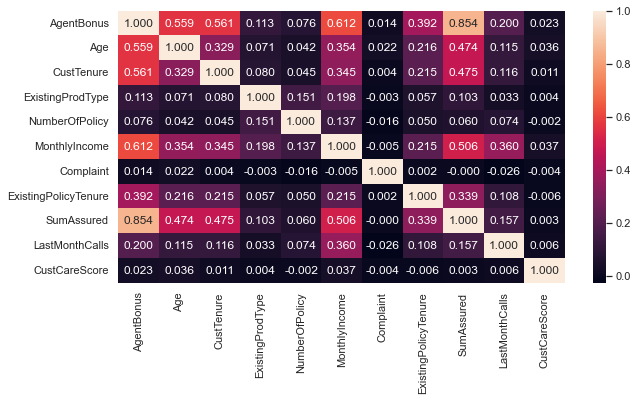

In [77]:
#mask = np.zeros_like(df_LinReg.corr()) #Creates an array of the same size as df.corr()
#mask[np.triu_indices_from(mask)] = True #Returns the indices of the Upper Triangle (if you use tril_indices, it will return lower Triangle)
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot=True,fmt='.3f');

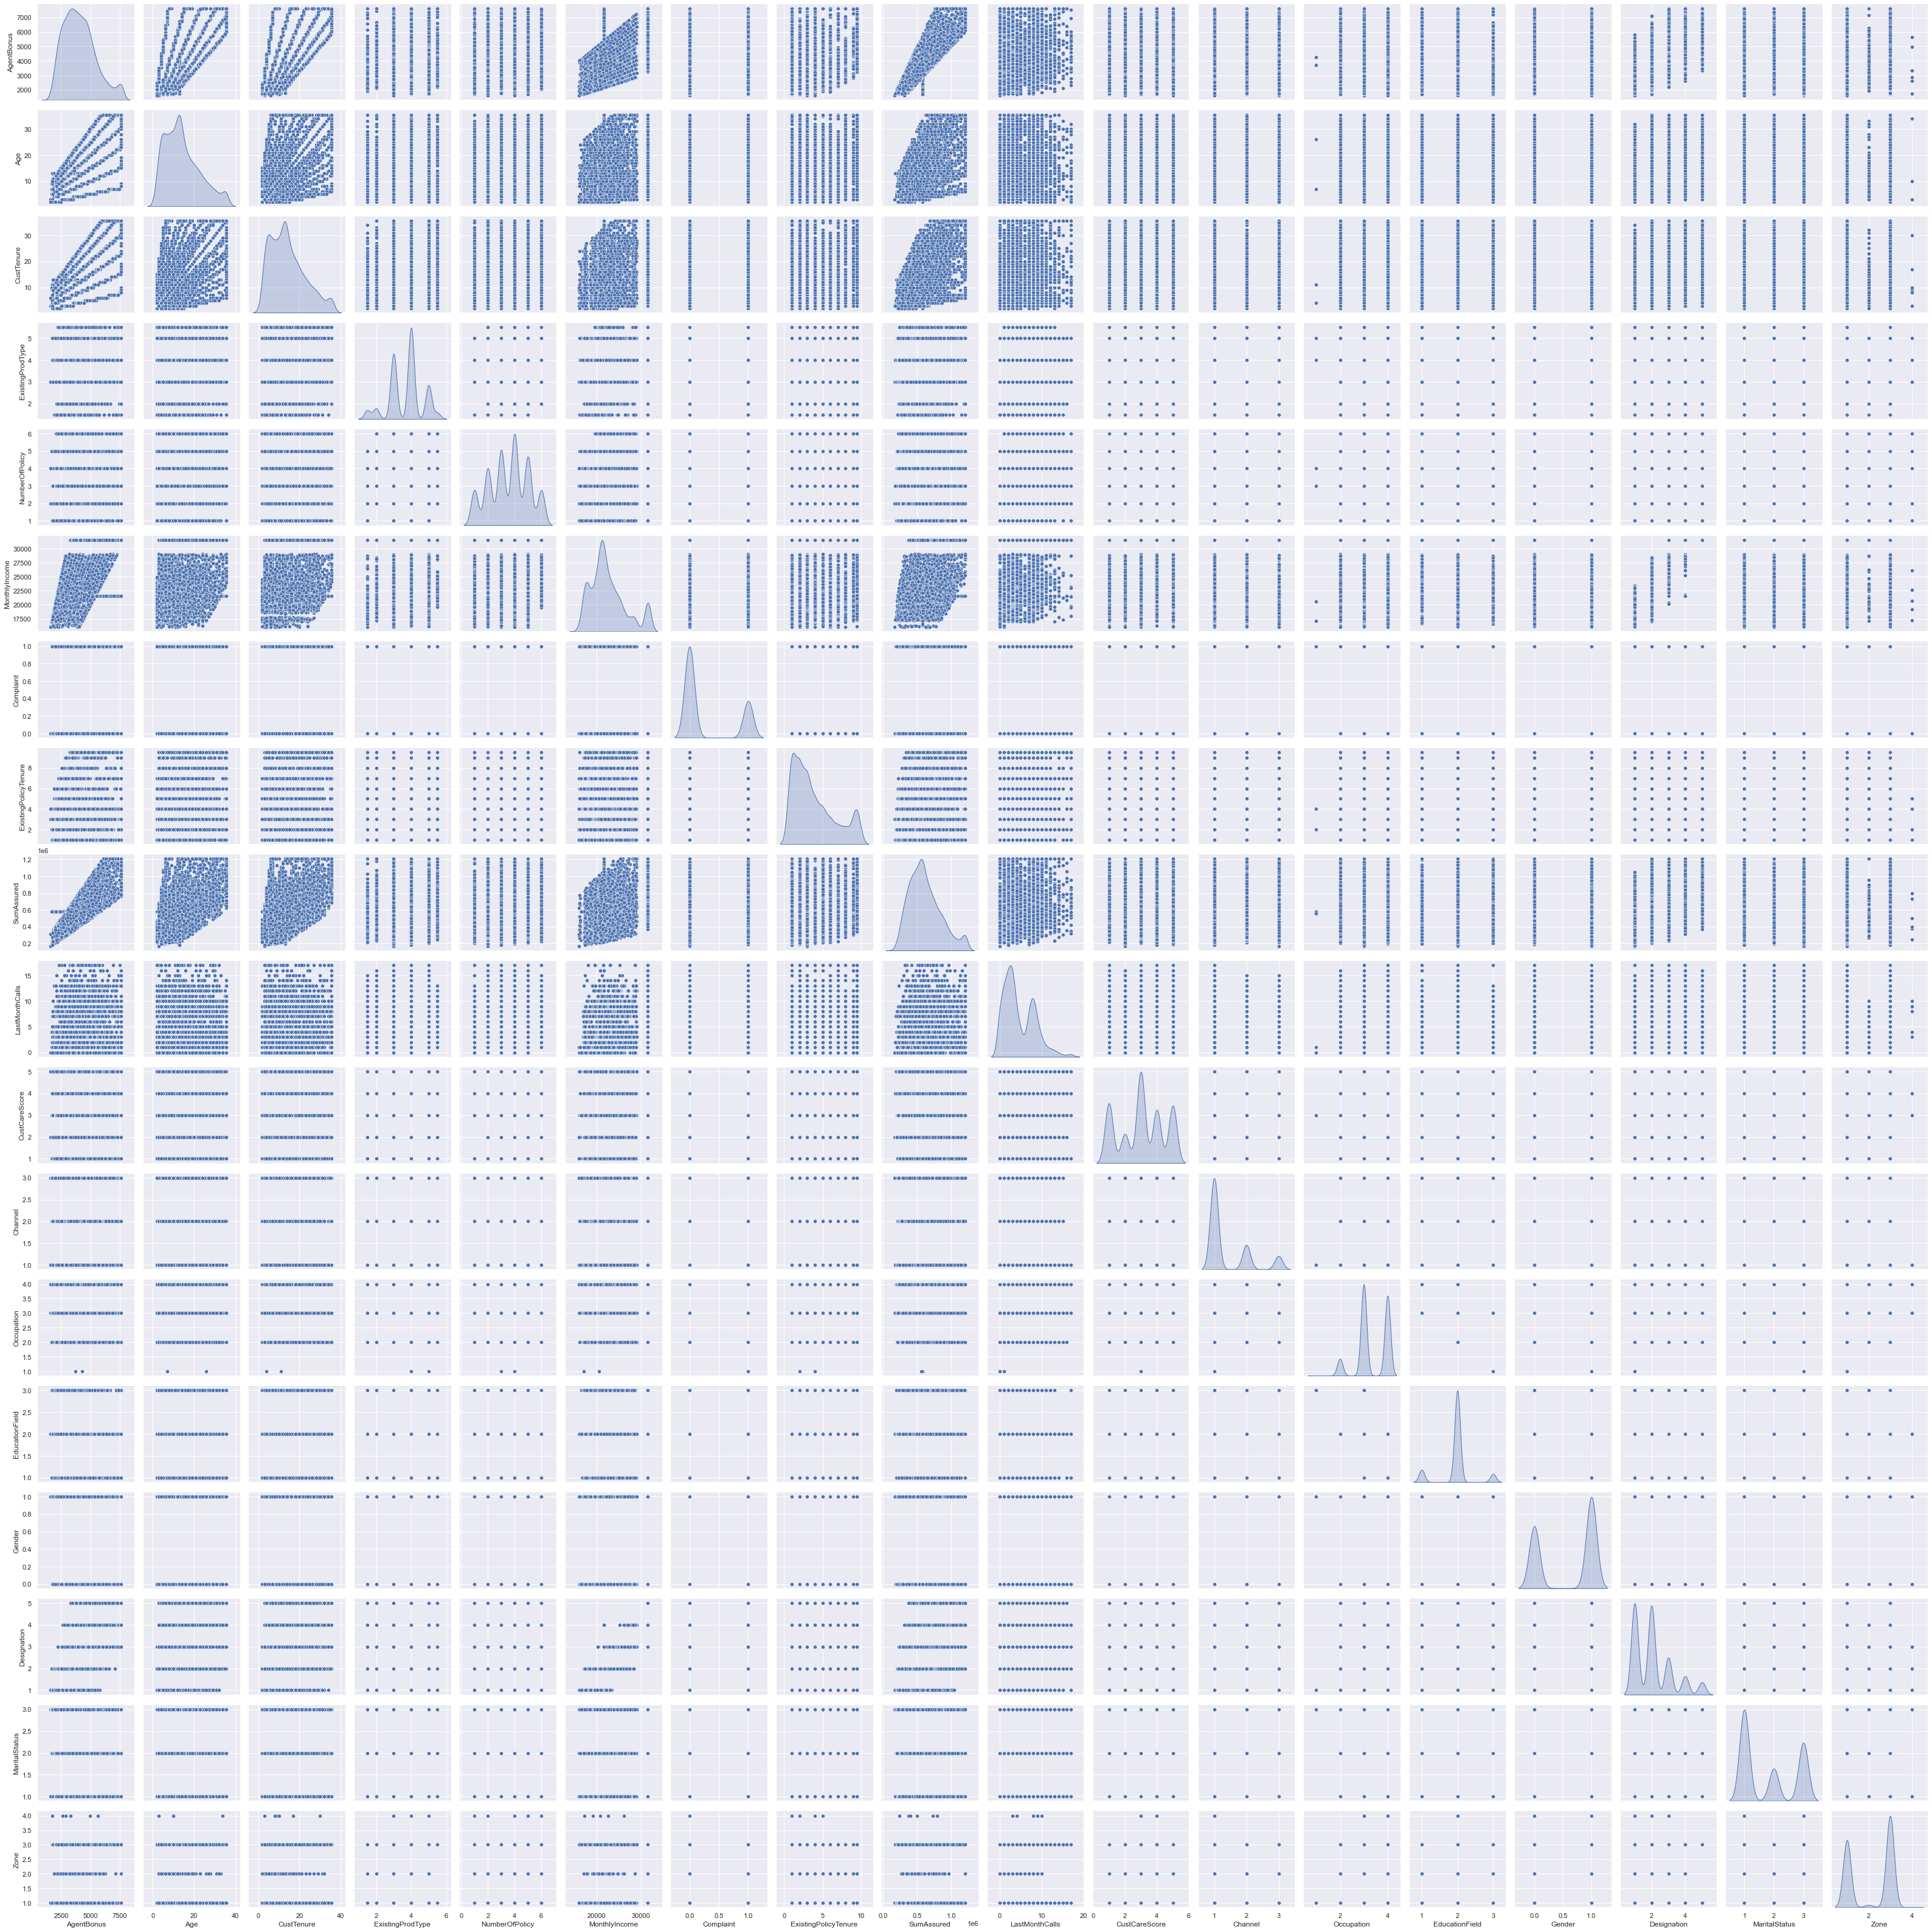

In [78]:
sns.pairplot(df1,diag_kind='kde')
plt.show()

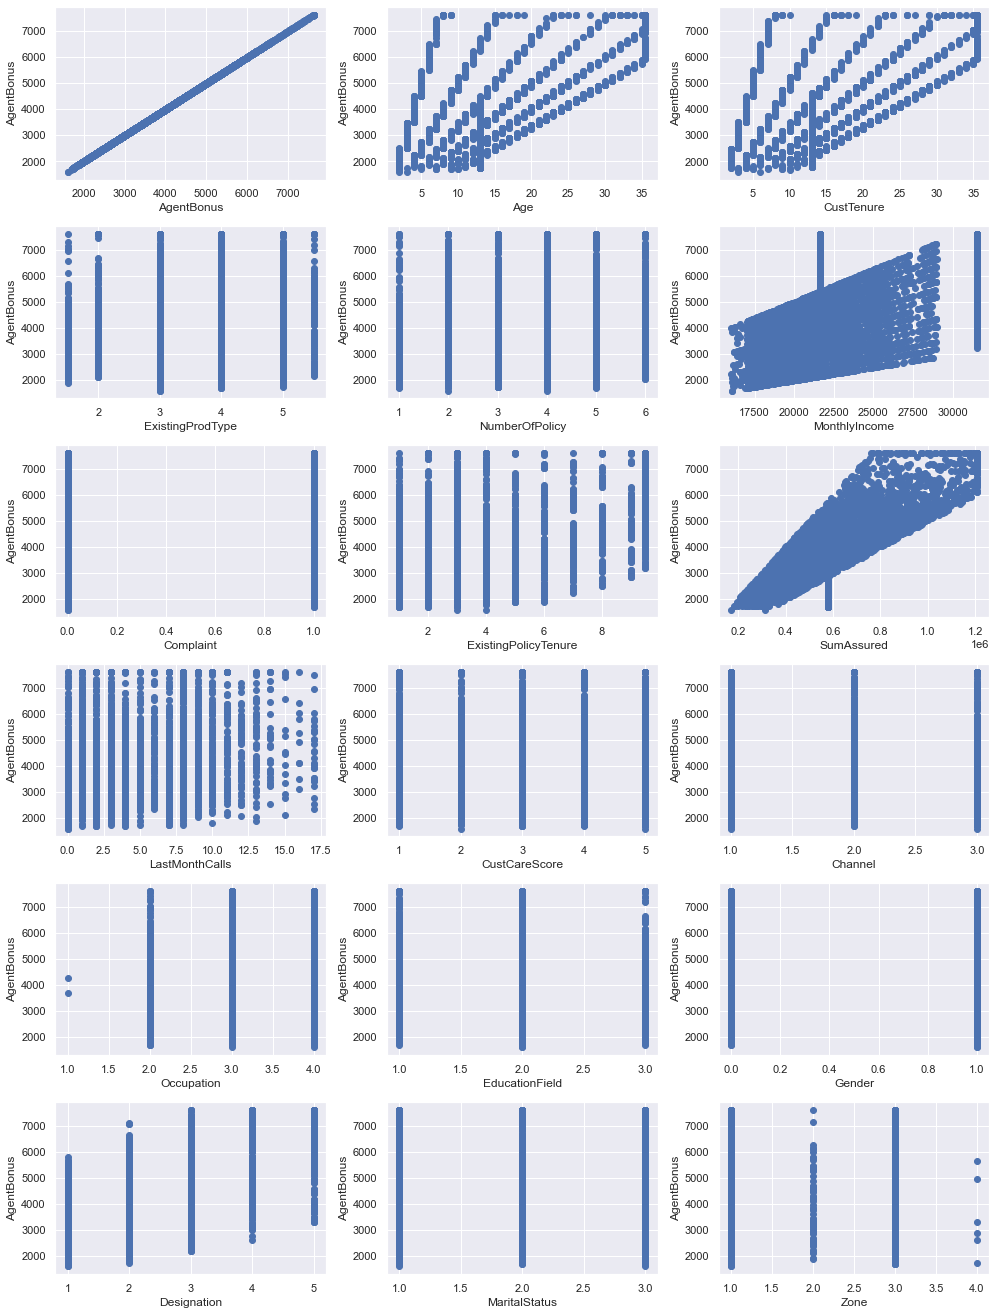

In [79]:
plt.figure(figsize=(14,21))
for i in range(len(df1.columns)):
    plt.subplot(7, 3, i+1)
    #sns.scatterplot(y=df.AgentBonus,x=df1[col_val])
    plt.scatter(df1[df1.columns[i]], df1['AgentBonus'])
    plt.xlabel(df1.columns[i])
    plt.ylabel("AgentBonus")

plt.tight_layout()

<AxesSubplot:>

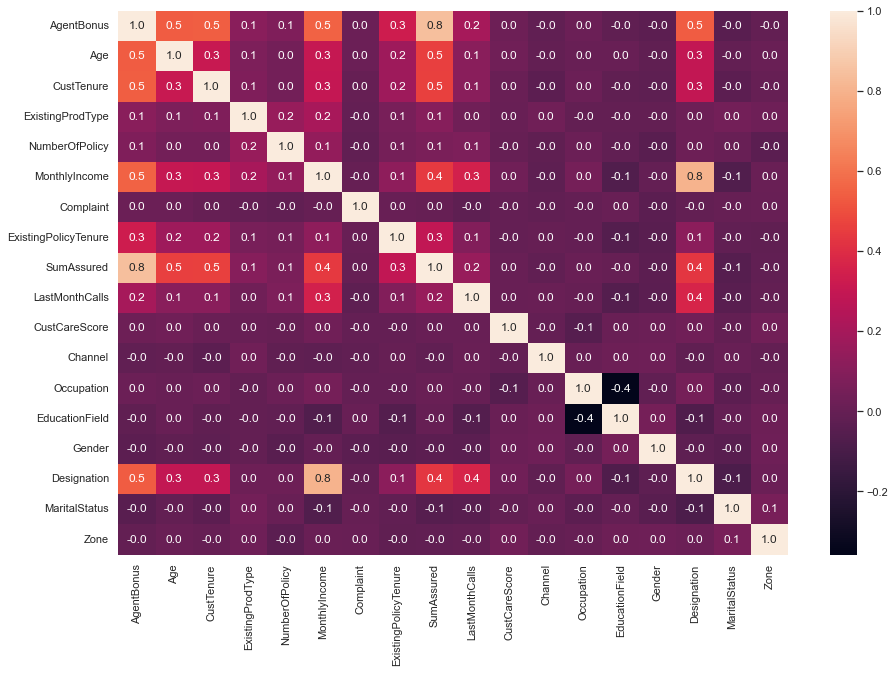

In [80]:
plt.figure(figsize=(15,10))
sns.heatmap(df1.corr(), annot=True, fmt=".1f",square=False)

# PROJECT NOTES-II-2

In [81]:
df_scaled = df1.apply(zscore)

In [82]:
X = df_scaled.drop('AgentBonus', axis=1)
 
y = df_scaled[['AgentBonus']]

In [83]:
X.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone
0,0.922528,-1.231573,-0.742887,-1.083186,-0.383025,1.575525,-0.692870,0.838355,0.104054,-0.775947,-0.594015,-0.523319,0.088540,-1.211301,-0.071796,1.329860,-1.173514
1,-0.391386,-1.471557,0.325131,0.296941,-0.601358,-0.634709,-0.321124,-1.395405,0.658028,-0.048597,0.902611,-0.523319,0.088540,0.825559,-0.071796,0.204211,-1.173514
2,1.400315,-1.231573,0.325131,-0.393123,-1.370456,1.575525,-0.692870,-0.154924,-1.280881,-0.048597,-0.594015,-3.664625,2.442662,0.825559,-0.963334,1.329860,-1.173514
3,-0.391386,-0.151649,-0.742887,-0.393123,-1.163255,1.575525,-0.692870,-1.508201,-1.280881,1.406102,0.902611,-0.523319,0.088540,-1.211301,-0.963334,0.204211,0.861117
4,-0.988620,-0.151649,-0.742887,0.296941,-1.021832,-0.634709,0.050622,-1.081865,-0.726907,1.406102,-0.594015,1.047333,0.088540,0.825559,-0.963334,0.204211,0.861117


In [84]:
y.head()

,AgentBonus
0,0.254928
1,-1.361260
2,0.154790
3,-1.672717
4,-0.815659


In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [86]:
display(X_train.shape)
display(y_train.shape)
display(X_test.shape)
display(y_test.shape)

(3164, 17)

(3164, 1)

(1356, 17)

(1356, 1)

In [87]:
print(X_train.columns)

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone'],
      dtype='object')


In [88]:
print(y_train.columns)

Index(['AgentBonus'], dtype='object')


In [89]:
print(X_test.columns)

Index(['Age', 'CustTenure', 'ExistingProdType', 'NumberOfPolicy',
       'MonthlyIncome', 'Complaint', 'ExistingPolicyTenure', 'SumAssured',
       'LastMonthCalls', 'CustCareScore', 'Channel', 'Occupation',
       'EducationField', 'Gender', 'Designation', 'MaritalStatus', 'Zone'],
      dtype='object')


In [90]:
print(y_test.columns)

Index(['AgentBonus'], dtype='object')


# LinearRegression

In [91]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [92]:
intercept=regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.002080793314203467


In [93]:
#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
coefficients = pd.DataFrame({"Feature":X_train.columns,"Coefficients": np.transpose(regression_model.coef_[0])})
coefficients.sort_values("Coefficients", axis=0, ascending=False)

,Feature,Coefficients
7,SumAssured,0.603529
1,CustTenure,0.140026
0,Age,0.133277
4,MonthlyIncome,0.117859
14,Designation,0.092659
6,ExistingPolicyTenure,0.082013
15,MaritalStatus,0.019399
3,NumberOfPolicy,0.015310
13,Gender,0.012598
5,Complaint,0.012514


In [94]:
#R^2 Training and Test data
print('The Regression model train Score:',regression_model.score(X_train, y_train))
print('')
print('The Regression model test Score:',regression_model.score(X_test, y_test))

The Regression model train Score: 0.8012599191522445

The Regression model test Score: 0.7885003167029179


In [95]:
#Training MSE
mse = np.mean((regression_model.predict(X_train)-y_train)**2)
math.sqrt(mse)

0.4459153324956291

In [96]:
#Test MSE
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

0.45960450380308915

In [97]:
ytrain_predict = regression_model.predict(X_train)
ytest_predict = regression_model.predict(X_test)

In [98]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
print('Linear Regression RMSE training data ',np.sqrt(metrics.mean_squared_error(y_train,ytrain_predict)))

#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
print('Linear Regression RMSE testing data ',np.sqrt(metrics.mean_squared_error(y_test,ytest_predict)))

Linear Regression RMSE training data  0.44591533249562926
Linear Regression RMSE testing data  0.45960450380308937


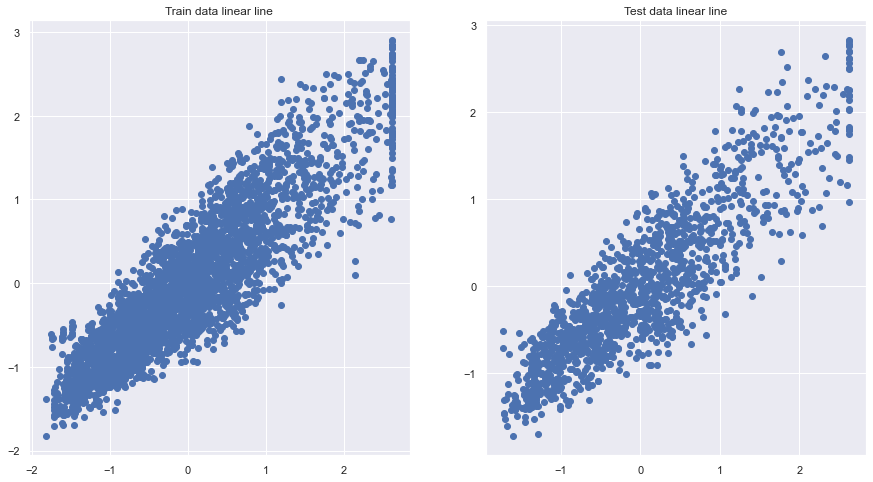

In [99]:
figure, axis = plt.subplots(1, 2)
axis[0].scatter(y_train['AgentBonus'], ytrain_predict)
axis[0].set_title("Train data linear line")
axis[1].scatter(y_test['AgentBonus'], ytest_predict)
axis[1].set_title("Test data linear line")

figure.set_figheight(8)
figure.set_figwidth(15)


In [100]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,AgentBonus
2461,-0.271940,0.208326,0.325131,-0.393123,-0.446526,1.575525,0.050622,-0.583033,-1.003894,0.678752,0.902611,-2.093972,0.08854,0.825559,-0.963334,1.329860,0.861117,-0.089663
3681,1.997549,0.088335,0.325131,0.987005,0.225423,-0.634709,0.050622,0.013965,-0.726907,0.678752,-0.594015,1.047333,0.08854,0.825559,-0.071796,-0.921439,0.861117,0.799057
1309,0.086401,-0.991590,-0.742887,-1.773250,-1.587524,-0.634709,0.794113,-0.702688,-1.280881,1.406102,-0.594015,-0.523319,0.08854,0.825559,-0.963334,1.329860,-1.173514,-0.720675
4254,-1.108067,0.208326,0.325131,-1.083186,0.260336,-0.634709,-1.064616,-1.449063,0.935015,-0.048597,2.399237,-2.093972,0.08854,0.825559,-0.071796,-0.921439,0.861117,-1.085146
1335,-0.749727,0.328318,-2.344913,-1.773250,-1.325171,-0.634709,0.794113,0.591562,-1.003894,1.406102,-0.594015,-0.523319,0.08854,0.825559,-0.963334,-0.921439,0.861117,0.060543


In [101]:
data_test.head()

,Age,CustTenure,ExistingProdType,NumberOfPolicy,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,LastMonthCalls,CustCareScore,Channel,Occupation,EducationField,Gender,Designation,MaritalStatus,Zone,AgentBonus
610,-0.391386,1.048268,-0.742887,-1.083186,0.063001,-0.634709,-1.064616,0.743821,-0.172933,-0.775947,0.902611,-0.523319,0.088540,0.825559,-0.071796,1.329860,0.861117,1.197397
1519,0.683635,-0.871599,-0.742887,-1.773250,2.285892,-0.634709,-0.321124,2.553796,0.381041,-1.503296,-0.594015,1.047333,0.088540,-1.211301,2.602816,-0.921439,-1.173514,1.837246
1620,-0.869173,0.088335,-0.742887,-1.773250,-0.963897,-0.634709,0.050622,-0.803601,0.935015,-0.048597,-0.594015,-0.523319,2.442662,0.825559,-0.071796,-0.921439,-1.173514,-1.201482
2031,-0.152493,0.928276,-0.742887,0.296941,-0.283852,1.575525,0.050622,1.178203,0.658028,1.406102,0.902611,1.047333,0.088540,0.825559,-0.071796,-0.921439,-1.173514,0.315305
494,-0.271940,-0.031657,-0.742887,-0.393123,-1.327701,-0.634709,-1.064616,-1.573296,-1.280881,-0.775947,-0.594015,1.047333,0.088540,0.825559,-0.963334,0.204211,0.861117,-1.212527


In [102]:
exp ='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Channel + Occupation + EducationField + Gender + Designation + MaritalStatus + Zone +  CustCareScore + LastMonthCalls'

In [103]:
lm1 = smf.ols(formula= exp, data = data_train).fit()
lm1.params

Intercept              -0.002081
Age                     0.133277
CustTenure              0.140026
ExistingProdType       -0.009314
NumberOfPolicy          0.015310
MonthlyIncome           0.117859
Complaint               0.012514
ExistingPolicyTenure    0.082013
SumAssured              0.603529
Channel                 0.004634
Occupation             -0.000257
EducationField          0.004049
Gender                  0.012598
Designation             0.092659
MaritalStatus           0.019399
Zone                   -0.002982
CustCareScore           0.011712
LastMonthCalls         -0.005719
dtype: float64

In [104]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     746.1
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:43:46   Log-Likelihood:                -1934.2
No. Observations:                3164   AIC:                             3904.
Df Residuals:                    3146   BIC:                             4013.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0021 

In [105]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [106]:
i=0
for column in X.columns:
    if i < 18:
        print (column ,"--->",  vif[i])
        i = i+1


Age ---> 1.306343801235912
CustTenure ---> 1.3081005869598255
ExistingProdType ---> 1.1319129544674138
NumberOfPolicy ---> 1.064813795320549
MonthlyIncome ---> 3.360382018629411
Complaint ---> 1.0035460655620618
ExistingPolicyTenure ---> 1.1061057357321789
SumAssured ---> 1.7125267913080493
LastMonthCalls ---> 1.1776227025654817
CustCareScore ---> 1.0069733280806898
Channel ---> 1.0057618349447914
Occupation ---> 1.1556122831988924
EducationField ---> 1.163518849164721
Gender ---> 1.014339342394037
Designation ---> 3.2230202200578293
MaritalStatus ---> 1.0175584589155833
Zone ---> 1.010381040885463


In [107]:
exp1 ='AgentBonus ~ Age + CustTenure + ExistingProdType + NumberOfPolicy + Complaint + ExistingPolicyTenure + SumAssured + Channel + Occupation + EducationField + Gender + MaritalStatus + Zone +  CustCareScore + LastMonthCalls'

In [108]:
lm2 = smf.ols(formula= exp1, data = data_train).fit()
lm2.params

Intercept              -0.002446
Age                     0.154026
CustTenure              0.159417
ExistingProdType        0.003950
NumberOfPolicy          0.024599
Complaint               0.011151
ExistingPolicyTenure    0.075556
SumAssured              0.667733
Channel                 0.001261
Occupation              0.006776
EducationField         -0.007176
Gender                  0.013033
MaritalStatus           0.007191
Zone                    0.004349
CustCareScore           0.017368
LastMonthCalls          0.051205
dtype: float64

In [109]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     723.2
Date:                Tue, 15 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:43:46   Log-Likelihood:                -2129.9
No. Observations:                3164   AIC:                             4292.
Df Residuals:                    3148   BIC:                             4389.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.0024 

In [110]:
X_train = X_train.drop(['Designation', 'MonthlyIncome'], axis=1)
X_test = X_test.drop(['Designation', 'MonthlyIncome'], axis=1)

In [111]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [[ 0.15404159  0.15943194  0.00395426  0.02459905  0.01115045  0.07556587
   0.66765305  0.05120727  0.01736604  0.00126165  0.00677784 -0.00717389
   0.01303013  0.00718681  0.00434785]]


In [112]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.10323134  0.10625214  0.          0.          0.          0.00686884
  0.64509616  0.          0.          0.          0.         -0.
  0.          0.          0.        ]


In [113]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))

0.77508203678413
0.7614972998512282


In [114]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))

0.7498348944429071
0.7363501870348736


# KNN Model

In [115]:
knnmodel=KNeighborsRegressor(n_neighbors=5, weights='uniform')
knnmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [116]:
# Calculate MSE train

from sklearn.metrics import mean_squared_error
ypred_train = knnmodel.predict(X_train)
knn_mse_train = (mean_squared_error(y_train,ypred_train))
print('The train MSE KNN:',knn_mse_train)

# Calculate MSE test

ypred_test = knnmodel.predict(X_test)
knn_mse_test = (mean_squared_error(y_test,ypred_test))
print('The test MSE KNN:',knn_mse_test)

The train MSE KNN: 0.23929514609455751
The test MSE KNN: 0.3842737998728304


In [117]:
# Calculate RMSE train

knn_rmse_train = math.sqrt(knn_mse_train)
print('The KNN RMSE train:',knn_rmse_train)

# Calculate RMSE test

knn_rmse_test = math.sqrt(knn_mse_test)
print('The KNN RMSE test:',knn_rmse_test)

The KNN RMSE train: 0.489178031083324
The KNN RMSE test: 0.6198982173492923


In [118]:
# R square train

knn_r2_train=knnmodel.score(X_train,y_train)
print('The KNN train score is:',knn_r2_train)

# R square test

knn_r2_test=knnmodel.score(X_test,y_test)
print('The KNN test score is:',knn_r2_test)

The KNN train score is: 0.7608256840695466
The KNN test score is: 0.6152470621538209


# Random Forest

In [119]:
Randomregressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
Randomregressor.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [120]:
ypred_train = Randomregressor.predict(X_train)
ypred_test = Randomregressor.predict(X_test)

In [121]:
RF_mse_train = (mean_squared_error(y_train,ypred_train))
print('Random Forest train MSE:',RF_mse_train)

RF_mse_test = (mean_squared_error(y_test,ypred_test))
print('Random Forest test MSE :',RF_mse_test)

Random Forest train MSE: 0.02176162446820957
Random Forest test MSE : 0.16563151272325835


In [122]:
# Calculate RMSE train

RF_rmse_train = math.sqrt(RF_mse_train)
print('The RF RMSE train:',RF_rmse_train)

# Calculate RMSE test

RF_rmse_test = math.sqrt(RF_mse_test)
print('The RF RMSE test:',RF_rmse_test)

The RF RMSE train: 0.14751821741130675
The RF RMSE test: 0.40697851629202536


In [123]:
# R square train

RF_r2_train=Randomregressor.score(X_train,y_train)
print('The RF train score is:',RF_r2_train)

# R square test

RF_r2_test=Randomregressor.score(X_test,y_test)
print('The RF test score is:',RF_r2_test)

The RF train score is: 0.9782493638894675
The RF test score is: 0.8341619669587934


# Artificial Neural Network (ANN)

In [124]:
Annmodel=MLPRegressor(hidden_layer_sizes=(20,20,), activation='logistic', max_iter=1000)

In [125]:
Annmodel.fit(X_train, y_train)

MLPRegressor(activation='logistic', hidden_layer_sizes=(20, 20), max_iter=1000)

In [126]:
ypred_train = Annmodel.predict(X_train)
ypred_test = Annmodel.predict(X_test)

In [127]:
Ann_mse_train = (mean_squared_error(y_train,ypred_train))
print('ANN train MSE:',Ann_mse_train)

Ann_mse_test = (mean_squared_error(y_test,ypred_test))
print('ANN test MSE :',Ann_mse_test)

ANN train MSE: 0.22750103099363925
ANN test MSE : 0.24074197444528078


In [128]:
# Calculate RMSE train

Ann_rmse_train = math.sqrt(Ann_mse_train)
print('ANN RMSE train:',Ann_rmse_train)

# Calculate RMSE test

Ann_rmse_test = math.sqrt(Ann_mse_test)
print('ANN RMSE test:',Ann_rmse_test)

ANN RMSE train: 0.47697068148224714
ANN RMSE test: 0.49065463866683334


In [129]:
# R square train

Ann_r2_train=Annmodel.score(X_train,y_train)
print('The Ann train score is:',Ann_r2_train)

# R square test

Ann_r2_test=Annmodel.score(X_test,y_test)
print('The Ann test score is:',Ann_r2_test)

The Ann train score is: 0.7726138438266714
The Ann test score is: 0.7589578525484568


# Making 6 models

In [130]:
ann = MLPRegressor(hidden_layer_sizes=(20,20,), activation='logistic', max_iter=1000)
rfr = RandomForestRegressor(random_state=123)
Knn = KNeighborsRegressor(n_neighbors=5, weights='uniform')
regression_model = LinearRegression()
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=.3)

models=[regression_model,Knn,rfr,ann,lasso,ridge]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]
for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
        i.fit(X_train,y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        mape_train.append(mean_absolute_percentage_error(y_train,i.predict(X_train)))
        mape_test.append(mean_absolute_percentage_error(y_test,i.predict(X_test)))
        
a = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train Mape':mape_train,'Test Mape':mape_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','KNeighborsRegressor','Random Forest Regressor', 'ANN Regressor','Lasso Regression','Ridge Regression'])
a

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
Linear Regression,0.474375,0.488065,1.873268,4.562135,0.775082,0.761496
KNeighborsRegressor,0.489178,0.619898,1.752559,6.281935,0.760826,0.615247
Random Forest Regressor,0.149670,0.405643,0.668296,2.969166,0.977610,0.835249
ANN Regressor,0.476176,0.489557,2.014897,5.017138,0.773371,0.760035
Lasso Regression,0.500291,0.513149,1.760362,4.369116,0.749835,0.736350
Ridge Regression,0.474375,0.488063,1.873142,4.561692,0.775082,0.761497


# RandomForest Using Grid search

In [131]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [5, 7],
    'min_samples_leaf': [3, 10,25],
    'min_samples_split': [30, 50,100],
    'n_estimators': [250, 500]
}

rfrg = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfrg, param_grid = param_grid, cv = 3)

In [132]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [5, 7],
                         'min_samples_leaf': [3, 10, 25],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [250, 500]})

In [133]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 500}


# ANN using Grid search

In [134]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu","logistic"], 
    "solver": ["sgd", "adam"]}

annrg = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annrg, param_grid = param_grid, cv = 3)

In [135]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=MLPRegressor(max_iter=10000, random_state=123),
             param_grid={'activation': ['tanh', 'relu', 'logistic'],
                         'hidden_layer_sizes': [500, (100, 100)],
                         'solver': ['sgd', 'adam']})

In [136]:
print(grid_search.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}


# KNN using Gridsearch

In [137]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knng = KNeighborsRegressor()

knnGridsearch = GridSearchCV(knng, params, cv=5)



In [138]:
knnGridsearch.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9]})

In [139]:
knnGridsearch.best_params_

{'n_neighbors': 9}

In [140]:
anng = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfrg = RandomForestRegressor(max_depth=10, max_features=7, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
knng = KNeighborsRegressor(n_neighbors= 9)
models=[knng,rfrg,anng]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(X_train, y_train)
        scores_train.append(i.score(X_train, y_train))
        scores_test.append(i.score(X_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
        mape_train.append(mean_absolute_percentage_error(y_train,i.predict(X_train)))
        mape_test.append(mean_absolute_percentage_error(y_test,i.predict(X_test)))
        
     
            
        
a1 = pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Train Mape': mape_train,'Test Mape': mape_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['KNN Regressor Gridsearch','Random Forest Regressor Gridsearch', 'ANN Regressor Gridsearch'])
a1

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
KNN Regressor Gridsearch,0.526592,0.602661,2.008631,4.376970,0.722841,0.636347
Random Forest Regressor Gridsearch,0.356992,0.415353,1.582283,2.651499,0.872621,0.827266
ANN Regressor Gridsearch,0.442777,0.473439,1.937007,4.478961,0.804047,0.775576


# Gradient Boosting

In [141]:
gbr_params = {'n_estimators': [500, 1000],
          'max_depth': [7,10],
          'min_samples_split': [5, 10],
          'learning_rate': [0.01, 1.0]
             }

grad = GradientBoostingRegressor(random_state= 100)
    
grid_search_grad = GridSearchCV(estimator = grad, param_grid = gbr_params, cv= 3)




In [142]:
grid_search_grad.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=100),
             param_grid={'learning_rate': [0.01, 1.0], 'max_depth': [7, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [500, 1000]})

In [143]:
grid_search_grad.best_params_

{'learning_rate': 0.01,
 'max_depth': 7,
 'min_samples_split': 10,
 'n_estimators': 500}

In [144]:
gB_train_score = grid_search_grad.score(X_train, y_train)
print('Train score:',gB_train_score)
gB_test_score = grid_search_grad.score(X_test, y_test)
print('Test Score:',gB_test_score)

Train score: 0.9301924450400749
Test Score: 0.8371147466996627


In [145]:
ypred_train = grid_search_grad.predict(X_train)
ypred_test = grid_search_grad.predict(X_test)

In [146]:
GBoost_mse_train = (mean_squared_error(y_train,ypred_train))
print('GradBoosting train MSE:',GBoost_mse_train)

GBoost_mse_test = (mean_squared_error(y_test,ypred_test))
print('GradBoosting test MSE :',GBoost_mse_test)

GradBoosting train MSE: 0.06984282153229388
GradBoosting test MSE : 0.162682410118446


In [147]:
# Calculate RMSE train

GBoost_rmse_train = math.sqrt(GBoost_mse_train)
print('GBoosting RMSE train:',GBoost_rmse_train)

# Calculate RMSE test

GBoost_rmse_test = math.sqrt(GBoost_mse_test)
print('GBoosting RMSE test:',GBoost_rmse_test)

GBoosting RMSE train: 0.2642779247918635
GBoosting RMSE test: 0.4033390758635295


In [148]:
GBoost_mape_train = mean_absolute_percentage_error(y_train,ypred_train)
print('GBoost train MAPE :',GBoost_mape_train)

GBoost_mape_test = mean_absolute_percentage_error(y_test,ypred_test)
print('GBoost train MAPE :',GBoost_mape_test)


GBoost train MAPE : 1.1140213440336253
GBoost train MAPE : 3.3694193718502703


In [149]:
gb = pd.DataFrame({'Train RMSE': GBoost_rmse_train,'Test RMSE': GBoost_rmse_test,'Train Mape': GBoost_mape_train,'Test Mape': GBoost_mape_test,'Training Score':gB_train_score,'Test Score': gB_test_score},
            index=['Gradient Boosting'])
gb

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
Gradient Boosting,0.264278,0.403339,1.114021,3.369419,0.930192,0.837115


# AdaBoosting

In [150]:
ada = AdaBoostRegressor(n_estimators=200, learning_rate=1.0, random_state= 1)

In [151]:
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=200, random_state=1)

In [152]:
ada_train_score = ada.score(X_train, y_train)
print('Train score:',ada_train_score)
ada_test_score = ada.score(X_test, y_test)
print('Test Score:',ada_test_score)

Train score: 0.7461374120887965
Test Score: 0.73383802598484


In [153]:
ypred_train = ada.predict(X_train)
ypred_test = ada.predict(X_test)

adaBoost_mse_train = (mean_squared_error(y_train,ypred_train))
print('GradBoosting train MSE:',adaBoost_mse_train)

adaBoost_mse_test = (mean_squared_error(y_test,ypred_test))
print('GradBoosting test MSE :',adaBoost_mse_test)

# Calculate RMSE train

adaBoost_rmse_train = math.sqrt(adaBoost_mse_train)
print('GBoosting RMSE train:',adaBoost_rmse_train)

# Calculate RMSE test

adaBoost_rmse_test = math.sqrt(adaBoost_mse_test)
print('GBoosting RMSE test:',adaBoost_rmse_test)

GradBoosting train MSE: 0.253990838547305
GradBoosting test MSE : 0.2658305189533064
GBoosting RMSE train: 0.5039750376231992
GBoosting RMSE test: 0.5155875473217971


In [154]:
adaBoost_mape_train = mean_absolute_percentage_error(y_train,ypred_train)
print('adaBoost train MAPE :',adaBoost_mape_train)

adaBoost_mape_test = mean_absolute_percentage_error(y_test,ypred_test)
print('adaBoost train MAPE :',adaBoost_mape_test)


adaBoost train MAPE : 2.708170479736661
adaBoost train MAPE : 6.439418539942127


In [155]:
ada = pd.DataFrame({'Train RMSE': adaBoost_rmse_train,'Test RMSE': adaBoost_rmse_test,'Train Mape': adaBoost_mape_train,'Test Mape': adaBoost_mape_test,'Training Score':ada_train_score,'Test Score': ada_test_score},
            index=['Ada Boosting'])
ada

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
Ada Boosting,0.503975,0.515588,2.70817,6.439419,0.746137,0.733838


In [156]:
tunning = pd.concat([a1,gb,ada],axis=0)
tunning

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
KNN Regressor Gridsearch,0.526592,0.602661,2.008631,4.376970,0.722841,0.636347
Random Forest Regressor Gridsearch,0.356992,0.415353,1.582283,2.651499,0.872621,0.827266
ANN Regressor Gridsearch,0.442777,0.473439,1.937007,4.478961,0.804047,0.775576
Gradient Boosting,0.264278,0.403339,1.114021,3.369419,0.930192,0.837115
Ada Boosting,0.503975,0.515588,2.708170,6.439419,0.746137,0.733838


# Interpretation models metrices

In [157]:
concat_ds = pd.concat([a,a1,gb,ada],axis=0)
concat_ds

,Train RMSE,Test RMSE,Train Mape,Test Mape,Training Score,Test Score
Linear Regression,0.474375,0.488065,1.873268,4.562135,0.775082,0.761496
KNeighborsRegressor,0.489178,0.619898,1.752559,6.281935,0.760826,0.615247
Random Forest Regressor,0.149670,0.405643,0.668296,2.969166,0.977610,0.835249
ANN Regressor,0.476176,0.489557,2.014897,5.017138,0.773371,0.760035
Lasso Regression,0.500291,0.513149,1.760362,4.369116,0.749835,0.736350
Ridge Regression,0.474375,0.488063,1.873142,4.561692,0.775082,0.761497
KNN Regressor Gridsearch,0.526592,0.602661,2.008631,4.376970,0.722841,0.636347
Random Forest Regressor Gridsearch,0.356992,0.415353,1.582283,2.651499,0.872621,0.827266
ANN Regressor Gridsearch,0.442777,0.473439,1.937007,4.478961,0.804047,0.775576
Gradient Boosting,0.264278,0.403339,1.114021,3.369419,0.930192,0.837115
